# Feature Engineering(Rajshahi-2020 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

--------------------------------------

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Rajshahi\\real_2020.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,25.3,10.2,1019.4,78,4.8,3.3,5.4,225.0,VU
1,2,19.8,25.7,14.5,1019.8,76,5.1,2.8,3.5,146.0,C
2,3,18.2,23.6,14.6,1017.3,86,6,2.2,5.4,129.0,C
3,4,17.7,23.1,13.1,1015.1,91,4.2,1.5,3.5,164.0,U
4,5,16.2,21.8,11,1016.3,89,4.8,2.8,7.6,139.0,C


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         366 non-null    object 
 1   T         225 non-null    object 
 2   TM        225 non-null    object 
 3   Tm        225 non-null    object 
 4   SLP       225 non-null    object 
 5   H         225 non-null    object 
 6   VV        225 non-null    object 
 7   V         225 non-null    object 
 8   VM        225 non-null    object 
 9   AQI       325 non-null    float64
 10  Category  325 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.6+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,25.3,10.2,1019.4,78,4.8,3.3,5.4,225.0,VU
1,2,19.8,25.7,14.5,1019.8,76,5.1,2.8,3.5,146.0,C
2,3,18.2,23.6,14.6,1017.3,86,6,2.2,5.4,129.0,C
3,4,17.7,23.1,13.1,1015.1,91,4.2,1.5,3.5,164.0,U
4,5,16.2,21.8,11,1016.3,89,4.8,2.8,7.6,139.0,C
...,...,...,...,...,...,...,...,...,...,...,...
361,27,14.8,24,7.8,1013.6,75,5.3,1.3,5.4,295.0,VU
362,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.0,EU
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397.0,EU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,VU


-----------------------------------------------------------

In [6]:
aqi_data.isnull().sum()

D             0
T           141
TM          141
Tm          141
SLP         141
H           141
VV          141
V           141
VM          141
AQI          41
Category     41
dtype: int64

--------------------------------------------------------------------

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,25.3,10.2,1019.4,78,4.8,3.3,5.4,225.0,VU
1,2,19.8,25.7,14.5,1019.8,76,5.1,2.8,3.5,146.0,C
2,3,18.2,23.6,14.6,1017.3,86,6,2.2,5.4,129.0,C
3,4,17.7,23.1,13.1,1015.1,91,4.2,1.5,3.5,164.0,U
4,5,16.2,21.8,11,1016.3,89,4.8,2.8,7.6,139.0,C
...,...,...,...,...,...,...,...,...,...,...,...
361,27,14.8,24,7.8,1013.6,75,5.3,1.3,5.4,295.0,VU
362,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.0,EU
363,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397.0,EU
364,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,VU


----------------------------------------------------

In [8]:
aqi.isnull().sum()

D             0
T           189
TM          189
Tm          189
SLP         189
H           189
VV          189
V           189
VM          189
AQI          41
Category     41
dtype: int64

--------------------------------------------------------------------------

<AxesSubplot:>

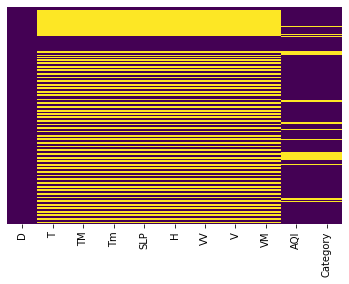

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

-------------------------------------------------------------------------

# Missing value Handling 
                   
                   1. Delete row data.
                   2. Create new model.
                   3. Statistical Method(Mean,Median,Mode)
                   
                   But here we use Statistical Method(Mean)
       

### 
T = Average Temperature (°C) , TM = Maximum temperature (°C), 

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa), 

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


## Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

-------------------------------------------------------------

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4,25.3,10.2,1019.4,78.0,4.8,3.3,5.4,225.0,VU
1,2,19.8,25.7,14.5,1019.8,76.0,5.1,2.8,3.5,146.0,C
2,3,18.2,23.6,14.6,1017.3,86.0,6.0,2.2,5.4,129.0,C
3,4,17.7,23.1,13.1,1015.1,91.0,4.2,1.5,3.5,164.0,U
4,5,16.2,21.8,11.0,1016.3,89.0,4.8,2.8,7.6,139.0,C
5,6,13.7,19.1,8.8,1019.5,85.0,4.8,4.4,13.0,179.0,U
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,U
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,VU
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,U
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,U


In [12]:
df1.isnull().sum()

D            0
T           25
TM          25
Tm          25
SLP         25
H           25
VV          25
V           25
VM          25
AQI          0
Category     0
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())

In [14]:
df1

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.400000,25.3,10.200000,1019.4,78.000000,4.80,3.300000,5.4,225.0,VU
1,2,19.800000,25.7,14.500000,1019.8,76.000000,5.10,2.800000,3.5,146.0,C
2,3,18.200000,23.6,14.600000,1017.3,86.000000,6.00,2.200000,5.4,129.0,C
3,4,17.700000,23.1,13.100000,1015.1,91.000000,4.20,1.500000,3.5,164.0,U
4,5,16.200000,21.8,11.000000,1016.3,89.000000,4.80,2.800000,7.6,139.0,C
5,6,13.700000,19.1,8.800000,1019.5,85.000000,4.80,4.400000,13.0,179.0,U
6,7,17.333333,23.1,12.033333,1017.9,84.166667,4.95,2.833333,6.4,185.0,U
7,8,17.333333,23.1,12.033333,1017.9,84.166667,4.95,2.833333,6.4,217.0,VU
8,9,17.333333,23.1,12.033333,1017.9,84.166667,4.95,2.833333,6.4,189.0,U
9,10,17.333333,23.1,12.033333,1017.9,84.166667,4.95,2.833333,6.4,159.0,U


In [15]:
df1.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-2 (February)

In [16]:
df2 = aqi.iloc[31:60,0:11]
df2

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,C
32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,U
33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,U
35,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,VU
36,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,VU
37,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.0,U
38,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,U
39,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0,U
40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,U


In [17]:
df2.isnull().sum()

D            0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          18
AQI          3
Category     3
dtype: int64

In [18]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())

In [19]:
df2

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,146.000000,C
32,2,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,154.000000,U
33,3,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,187.384615,NaN
34,4,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,177.000000,U
35,5,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,204.000000,VU
36,6,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,213.000000,VU
37,7,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,197.000000,U
38,8,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,186.000000,U
39,9,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,175.000000,U
40,10,21.209091,28.481818,15.518182,1015.145455,73.545455,5.290909,2.545455,6.909091,178.000000,U


In [20]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

-------------------------------------------------------------------

# Month-3(March)

In [21]:
df3 = aqi.iloc[60:91,0:11]
df3

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
60,Mar-01,22.3,29.8,15.0,1012.4,70.0,5.5,2.8,5.4,183.0,U
61,2,21.7,30.4,16.8,1011.7,81.0,4.5,3.0,7.6,307.0,EU
62,3,24.4,31.7,17.9,1010.6,69.0,5.3,2.6,7.6,235.0,VU
63,4,21.7,28.5,17.7,1011.4,80.0,5.3,1.3,3.5,142.0,C
64,5,22.3,28.5,16.0,1011.4,82.0,5.3,1.5,3.5,NaN,NaN
65,6,23.4,30.5,18.8,1013.8,82.0,5.3,3.1,9.4,160.0,U
66,7,22.3,27.4,19.5,1013.8,82.0,6.1,2.0,9.4,126.0,C
67,8,22.9,30.3,16.5,1012.0,70.0,6.0,2.8,7.6,128.0,C
68,9,21.7,29.0,14.8,1012.0,66.0,5.8,2.6,7.6,145.0,C
69,10,22.3,30.0,14.6,1011.8,57.0,5.8,3.0,9.4,236.0,VU


In [22]:
df3.isnull().sum()

D            0
T           10
TM          10
Tm          10
SLP         10
H           10
VV          10
V           10
VM          10
AQI          8
Category     8
dtype: int64

In [23]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [24]:
df3

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
60,Mar-01,22.300000,29.800000,15.000000,1012.400000,70.0,5.500000,2.800000,5.400000,183.000000,U
61,2,21.700000,30.400000,16.800000,1011.700000,81.0,4.500000,3.000000,7.600000,307.000000,EU
62,3,24.400000,31.700000,17.900000,1010.600000,69.0,5.300000,2.600000,7.600000,235.000000,VU
63,4,21.700000,28.500000,17.700000,1011.400000,80.0,5.300000,1.300000,3.500000,142.000000,C
64,5,22.300000,28.500000,16.000000,1011.400000,82.0,5.300000,1.500000,3.500000,157.347826,NaN
65,6,23.400000,30.500000,18.800000,1013.800000,82.0,5.300000,3.100000,9.400000,160.000000,U
66,7,22.300000,27.400000,19.500000,1013.800000,82.0,6.100000,2.000000,9.400000,126.000000,C
67,8,22.900000,30.300000,16.500000,1012.000000,70.0,6.000000,2.800000,7.600000,128.000000,C
68,9,21.700000,29.000000,14.800000,1012.000000,66.0,5.800000,2.600000,7.600000,145.000000,C
69,10,22.300000,30.000000,14.600000,1011.800000,57.0,5.800000,3.000000,9.400000,236.000000,VU


In [25]:
df3.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    8
dtype: int64

# Month-4(April)

In [26]:
df4 = aqi.iloc[91:121,0:11]
df4

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
91,Apr-01,27.4,36.8,18.5,1007.8,53.0,6.1,2.2,5.4,168.0,U
92,2,29.1,38.2,21.0,1006.8,50.0,6.3,3.1,7.6,165.0,U
93,3,27.7,37.0,19.6,1009.3,57.0,6.1,2.8,7.6,149.0,C
94,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,U
95,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,C
96,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.0,U
97,7,29.1,38.5,21.0,1006.8,44.0,6.3,3.7,7.6,164.0,U
98,8,30.7,39.0,22.2,1008.0,47.0,6.1,3.0,7.6,173.0,U
99,9,28.9,37.5,22.2,1008.8,54.0,6.1,3.5,7.6,104.0,C
100,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,C


In [27]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [28]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())

In [29]:
df4

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
91,Apr-01,27.400000,36.80,18.500000,1007.8,53.000000,6.100000,2.2,5.40,168.0,U
92,2,29.100000,38.20,21.000000,1006.8,50.000000,6.300000,3.1,7.60,165.0,U
93,3,27.700000,37.00,19.600000,1009.3,57.000000,6.100000,2.8,7.60,149.0,C
94,4,27.713333,34.76,21.333333,1008.9,65.666667,5.966667,3.8,8.08,152.0,U
95,5,27.713333,34.76,21.333333,1008.9,65.666667,5.966667,3.8,8.08,149.0,C
96,6,27.713333,34.76,21.333333,1008.9,65.666667,5.966667,3.8,8.08,171.0,U
97,7,29.100000,38.50,21.000000,1006.8,44.000000,6.300000,3.7,7.60,164.0,U
98,8,30.700000,39.00,22.200000,1008.0,47.000000,6.100000,3.0,7.60,173.0,U
99,9,28.900000,37.50,22.200000,1008.8,54.000000,6.100000,3.5,7.60,104.0,C
100,10,27.713333,34.76,21.333333,1008.9,65.666667,5.966667,3.8,8.08,109.0,C


In [30]:
df4.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-5 (May)

In [31]:
df5 = aqi.iloc[121:152,0:11]
df5

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
121,May-01,25.6,32.2,22.5,1008.8,86.0,5.8,3.1,7.6,31.0,G
122,2,23.9,31.0,21.2,1007.9,93.0,5.3,2.2,5.4,34.0,G
123,3,27.2,32.7,20.8,1007.7,80.0,5.3,2.2,5.4,42.0,G
124,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,G
125,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,G
126,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,G
127,7,25.2,34.3,20.2,1008.2,85.0,5.3,4.1,13.0,72.0,M
128,8,27.9,39.4,19.9,1007.4,75.0,6.0,1.3,3.5,20.0,G
129,9,29.3,35.0,23.2,1007.9,75.0,6.0,1.9,5.4,32.0,G
130,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,G


In [32]:
df5.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          0
Category     0
dtype: int64

In [33]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())

In [34]:
df5

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
121,May-01,25.60000,32.20000,22.50000,1008.8000,86.000,5.8000,3.1,7.60000,31.0,G
122,2,23.90000,31.00000,21.20000,1007.9000,93.000,5.3000,2.2,5.40000,34.0,G
123,3,27.20000,32.70000,20.80000,1007.7000,80.000,5.3000,2.2,5.40000,42.0,G
124,4,27.61875,33.20625,23.26875,1004.4625,82.375,5.7125,5.4,12.53125,43.0,G
125,5,27.61875,33.20625,23.26875,1004.4625,82.375,5.7125,5.4,12.53125,42.0,G
126,6,27.61875,33.20625,23.26875,1004.4625,82.375,5.7125,5.4,12.53125,40.0,G
127,7,25.20000,34.30000,20.20000,1008.2000,85.000,5.3000,4.1,13.00000,72.0,M
128,8,27.90000,39.40000,19.90000,1007.4000,75.000,6.0000,1.3,3.50000,20.0,G
129,9,29.30000,35.00000,23.20000,1007.9000,75.000,6.0000,1.9,5.40000,32.0,G
130,10,27.61875,33.20625,23.26875,1004.4625,82.375,5.7125,5.4,12.53125,30.0,G


In [35]:
df5.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-6 (June)

In [36]:
df6 = aqi.iloc[152:182,0:11]
df6

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
152,Jun-01,29.3,35.2,24.3,1006.2,77.0,6.3,3.7,7.6,33.0,G
153,2,29.3,36.5,25.1,1005.1,81.0,6.0,2.8,5.4,32.0,G
154,3,30.1,35.6,25.3,1003.9,79.0,5.8,3.5,5.4,40.0,G
155,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,G
156,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,G
157,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,G
158,7,29.8,37.0,26.6,1001.9,81.0,6.0,2.0,3.5,NaN,NaN
159,8,31.0,36.5,25.8,1001.5,77.0,6.0,2.4,5.4,NaN,NaN
160,9,30.6,36.0,27.0,1002.0,82.0,6.0,1.9,5.4,65.0,M
161,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M


In [37]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          2
Category     2
dtype: int64

In [38]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())

In [39]:
df6

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
152,Jun-01,29.300000,35.200000,24.300000,1006.200000,77.0,6.3,3.700000,7.600000,33.000000,G
153,2,29.300000,36.500000,25.100000,1005.100000,81.0,6.0,2.800000,5.400000,32.000000,G
154,3,30.100000,35.600000,25.300000,1003.900000,79.0,5.8,3.500000,5.400000,40.000000,G
155,4,29.366667,34.646667,25.913333,1001.953333,85.0,5.8,3.353333,5.713333,38.000000,G
156,5,29.366667,34.646667,25.913333,1001.953333,85.0,5.8,3.353333,5.713333,37.000000,G
157,6,29.366667,34.646667,25.913333,1001.953333,85.0,5.8,3.353333,5.713333,34.000000,G
158,7,29.800000,37.000000,26.600000,1001.900000,81.0,6.0,2.000000,3.500000,47.035714,NaN
159,8,31.000000,36.500000,25.800000,1001.500000,77.0,6.0,2.400000,5.400000,47.035714,NaN
160,9,30.600000,36.000000,27.000000,1002.000000,82.0,6.0,1.900000,5.400000,65.000000,M
161,10,29.366667,34.646667,25.913333,1001.953333,85.0,5.8,3.353333,5.713333,62.000000,M


In [40]:
df6.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Month-7 (July)

In [41]:
df7 = aqi.iloc[182:213,0:11]
df7

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
182,Jul-01,31.5,36.0,27.6,1000.5,82.0,6.3,2.8,5.4,61.0,M
183,2,30.6,35.6,28.0,999.5,87.0,5.6,3.0,5.4,56.0,M
184,3,30.7,35.6,27.6,1000.8,84.0,5.6,3.1,5.4,27.0,G
185,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,G
186,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
187,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,G
188,7,30.1,35.8,27.2,1002.3,88.0,6.0,4.1,7.6,23.0,G
189,8,29.7,34.1,27.2,1002.1,88.0,5.5,3.5,5.4,53.0,M
190,9,28.4,33.5,26.6,999.9,92.0,5.5,4.3,7.6,37.0,G
191,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,G


In [42]:
df7.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          3
Category     3
dtype: int64

In [43]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [44]:
df7

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
182,Jul-01,31.500,36.00000,27.60,1000.50000,82.000,6.30000,2.8,5.40000,61.000000,M
183,2,30.600,35.60000,28.00,999.50000,87.000,5.60000,3.0,5.40000,56.000000,M
184,3,30.700,35.60000,27.60,1000.80000,84.000,5.60000,3.1,5.40000,27.000000,G
185,4,29.725,34.10625,26.85,1002.04375,87.875,5.60625,3.2,5.59375,32.000000,G
186,5,29.725,34.10625,26.85,1002.04375,87.875,5.60625,3.2,5.59375,25.000000,G
187,6,29.725,34.10625,26.85,1002.04375,87.875,5.60625,3.2,5.59375,15.000000,G
188,7,30.100,35.80000,27.20,1002.30000,88.000,6.00000,4.1,7.60000,23.000000,G
189,8,29.700,34.10000,27.20,1002.10000,88.000,5.50000,3.5,5.40000,53.000000,M
190,9,28.400,33.50000,26.60,999.90000,92.000,5.50000,4.3,7.60000,37.000000,G
191,10,29.725,34.10625,26.85,1002.04375,87.875,5.60625,3.2,5.59375,24.000000,G


In [45]:
df7.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Month-8 (August)

In [46]:
df8 = aqi.iloc[213:244,0:11]
df8

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
213,Aug-01,31.3,36.4,26.8,1001.8,81.0,6.1,0.9,3.5,49.0,G
214,2,31.2,35.4,27.8,998.7,83.0,6.0,0.7,3.5,64.0,M
215,3,32.0,36.3,27.6,994.7,80.0,5.8,1.3,3.5,72.0,M
216,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,G
217,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
218,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,G
219,7,31.0,36.2,26.9,1001.2,81.0,6.0,3.9,5.4,20.0,G
220,8,31.4,36.2,28.3,999.4,82.0,6.3,3.5,5.4,46.0,G
221,9,31.1,35.7,28.2,1000.0,78.0,5.8,5.0,7.6,31.0,G
222,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,G


In [47]:
df8.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          1
Category     1
dtype: int64

In [48]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [49]:
df8

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
213,Aug-01,31.30000,36.40000,26.8,1001.80000,81.0000,6.10000,0.9000,3.50000,49.0,G
214,2,31.20000,35.40000,27.8,998.70000,83.0000,6.00000,0.7000,3.50000,64.0,M
215,3,32.00000,36.30000,27.6,994.70000,80.0000,5.80000,1.3000,3.50000,72.0,M
216,4,30.23125,34.44375,27.2,1000.38125,82.5625,5.70625,4.8875,8.95625,46.0,G
217,5,30.23125,34.44375,27.2,1000.38125,82.5625,5.70625,4.8875,8.95625,25.0,G
218,6,30.23125,34.44375,27.2,1000.38125,82.5625,5.70625,4.8875,8.95625,18.0,G
219,7,31.00000,36.20000,26.9,1001.20000,81.0000,6.00000,3.9000,5.40000,20.0,G
220,8,31.40000,36.20000,28.3,999.40000,82.0000,6.30000,3.5000,5.40000,46.0,G
221,9,31.10000,35.70000,28.2,1000.00000,78.0000,5.80000,5.0000,7.60000,31.0,G
222,10,30.23125,34.44375,27.2,1000.38125,82.5625,5.70625,4.8875,8.95625,38.0,G


In [50]:
df8.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    1
dtype: int64

# Month-9 (September)

In [51]:
df9 = aqi.iloc[244:274,0:11]
df9

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
244,Sep-01,27.9,30.7,26.0,1005.4,96.0,5.0,0.9,3.5,105.0,C
245,2,28.9,34.0,25.0,1007.8,88.0,5.6,2.8,5.4,NaN,NaN
246,3,30.2,35.7,26.0,1008.3,83.0,6.1,1.9,5.4,NaN,NaN
247,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,7,28.3,32.5,25.4,1005.1,95.0,4.8,2.2,3.5,NaN,NaN
251,8,29.6,34.0,26.0,1005.5,89.0,5.5,2.0,3.5,NaN,NaN
252,9,30.4,35.2,26.0,1004.0,87.0,6.1,1.9,3.5,NaN,NaN
253,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df9.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI         18
Category    18
dtype: int64

In [53]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())

In [54]:
df9

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
244,Sep-01,27.900000,30.700000,26.00,1005.400000,96.000000,5.0,0.90,3.50,105.000000,C
245,2,28.900000,34.000000,25.00,1007.800000,88.000000,5.6,2.80,5.40,69.166667,NaN
246,3,30.200000,35.700000,26.00,1008.300000,83.000000,6.1,1.90,5.40,69.166667,NaN
247,4,29.513333,34.226667,26.48,1003.926667,87.666667,5.6,2.92,5.44,69.166667,NaN
248,5,29.513333,34.226667,26.48,1003.926667,87.666667,5.6,2.92,5.44,69.166667,NaN
249,6,29.513333,34.226667,26.48,1003.926667,87.666667,5.6,2.92,5.44,69.166667,NaN
250,7,28.300000,32.500000,25.40,1005.100000,95.000000,4.8,2.20,3.50,69.166667,NaN
251,8,29.600000,34.000000,26.00,1005.500000,89.000000,5.5,2.00,3.50,69.166667,NaN
252,9,30.400000,35.200000,26.00,1004.000000,87.000000,6.1,1.90,3.50,69.166667,NaN
253,10,29.513333,34.226667,26.48,1003.926667,87.666667,5.6,2.92,5.44,69.166667,NaN


In [55]:
df9.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    18
dtype: int64

# Month-10 (October)

In [56]:
df10 = aqi.iloc[274:305,0:11]
df10

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
274,Oct-01,27.4,33.9,25.5,1003.2,94.0,5.3,0.9,3.5,72.0,M
275,2,28.1,31.6,24.8,1004.6,91.0,5.0,1.9,3.5,63.0,M
276,3,29.4,34.8,25.6,1005.7,90.0,6.1,3.9,7.6,56.0,M
277,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,M
278,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,M
279,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,G
280,7,27.6,32.0,26.0,1008.3,91.0,5.1,2.0,7.6,61.0,M
281,8,29.4,35.0,25.6,1008.0,86.0,5.6,1.1,3.5,78.0,M
282,9,29.9,34.6,27.1,1007.3,85.0,6.0,1.1,3.5,106.0,C
283,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,M


In [57]:
df10.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          0
Category     0
dtype: int64

In [58]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())

In [59]:
df10

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
274,Oct-01,27.400000,33.90,25.500000,1003.200000,94.0,5.300000,0.90,3.500000,72.0,M
275,2,28.100000,31.60,24.800000,1004.600000,91.0,5.000000,1.90,3.500000,63.0,M
276,3,29.400000,34.80,25.600000,1005.700000,90.0,6.100000,3.90,7.600000,56.0,M
277,4,28.586667,33.94,25.033333,1006.866667,84.0,5.593333,1.52,4.173333,64.0,M
278,5,28.586667,33.94,25.033333,1006.866667,84.0,5.593333,1.52,4.173333,53.0,M
279,6,28.586667,33.94,25.033333,1006.866667,84.0,5.593333,1.52,4.173333,44.0,G
280,7,27.600000,32.00,26.000000,1008.300000,91.0,5.100000,2.00,7.600000,61.0,M
281,8,29.400000,35.00,25.600000,1008.000000,86.0,5.600000,1.10,3.500000,78.0,M
282,9,29.900000,34.60,27.100000,1007.300000,85.0,6.000000,1.10,3.500000,106.0,C
283,10,28.586667,33.94,25.033333,1006.866667,84.0,5.593333,1.52,4.173333,98.0,M


In [60]:
df10.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

# Month-11 (November)

In [61]:
df11 = aqi.iloc[305:335,0:11]
df11

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
305,Nov-01,27.5,33.2,24.7,1010.9,85.0,5.6,1.7,7.6,121.0,C
306,2,27.1,33.2,23.3,1012.0,84.0,5.6,0.9,3.5,125.0,C
307,3,24.7,32.2,19.4,1011.8,76.0,5.1,1.3,3.5,170.0,U
308,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,EU
309,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,VU
310,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,VU
311,7,22.6,30.2,15.9,1015.3,74.0,5.6,2.2,5.4,194.0,U
312,8,23.3,31.8,18.1,1014.9,78.0,5.8,1.1,3.5,170.0,U
313,9,23.3,31.9,18.0,1013.7,78.0,5.6,1.9,5.4,149.0,C
314,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,C


In [62]:
df11.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          4
Category     4
dtype: int64

In [63]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())
df11["AQI"] = df11["AQI"].fillna(value=df11["AQI"].mean())

In [64]:
df11

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
305,Nov-01,27.500000,33.20,24.70,1010.900000,85.000000,5.600000,1.700000,7.60,121.000000,C
306,2,27.100000,33.20,23.30,1012.000000,84.000000,5.600000,0.900000,3.50,125.000000,C
307,3,24.700000,32.20,19.40,1011.800000,76.000000,5.100000,1.300000,3.50,170.000000,U
308,4,23.406667,30.52,18.52,1013.446667,76.733333,5.506667,1.706667,4.68,312.000000,EU
309,5,23.406667,30.52,18.52,1013.446667,76.733333,5.506667,1.706667,4.68,286.000000,VU
310,6,23.406667,30.52,18.52,1013.446667,76.733333,5.506667,1.706667,4.68,255.000000,VU
311,7,22.600000,30.20,15.90,1015.300000,74.000000,5.600000,2.200000,5.40,194.000000,U
312,8,23.300000,31.80,18.10,1014.900000,78.000000,5.800000,1.100000,3.50,170.000000,U
313,9,23.300000,31.90,18.00,1013.700000,78.000000,5.600000,1.900000,5.40,149.000000,C
314,10,23.406667,30.52,18.52,1013.446667,76.733333,5.506667,1.706667,4.68,131.000000,C


In [65]:
df11.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-12(December)

In [66]:
df12 = aqi.iloc[335:366,0:11]
df12

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
335,Dec-01,21.9,29.3,15.3,1014.8,70.0,5.6,1.9,5.4,195.0,U
336,2,20.2,28.5,14.2,1013.3,76.0,5.1,1.3,3.5,223.0,VU
337,3,19.7,27.7,14.4,1013.9,77.0,5.3,1.5,3.5,NaN,NaN
338,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.0,EU
339,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,EU
340,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,EU
341,7,20.9,26.0,16.6,1016.5,89.0,4.0,1.5,5.4,248.0,VU
342,8,20.1,25.6,16.4,1015.5,85.0,5.0,0.9,1.9,247.0,VU
343,9,19.3,25.4,16.1,1013.9,88.0,3.7,0.6,1.9,181.0,U
344,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.0,VU


In [67]:
df12.isnull().sum() 

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          2
Category     2
dtype: int64

In [68]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())
df12["AQI"] = df12["AQI"].fillna(value=df12["AQI"].mean())

In [69]:
df12

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
335,Dec-01,21.9000,29.30000,15.300,1014.8000,70.0000,5.6000,1.90,5.4000,195.000000,U
336,2,20.2000,28.50000,14.200,1013.3000,76.0000,5.1000,1.30,3.5000,223.000000,VU
337,3,19.7000,27.70000,14.400,1013.9000,77.0000,5.3000,1.50,3.5000,251.931034,NaN
338,4,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,327.000000,EU
339,5,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,373.000000,EU
340,6,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,360.000000,EU
341,7,20.9000,26.00000,16.600,1016.5000,89.0000,4.0000,1.50,5.4000,248.000000,VU
342,8,20.1000,25.60000,16.400,1015.5000,85.0000,5.0000,0.90,1.9000,247.000000,VU
343,9,19.3000,25.40000,16.100,1013.9000,88.0000,3.7000,0.60,1.9000,181.000000,U
344,10,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,171.000000,VU


In [70]:
df12.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

# Add 12 months frame in a single frame

In [71]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.4000,25.30000,10.200,1019.4000,78.0000,4.8000,3.30,5.4000,225.0,VU
1,2,19.8000,25.70000,14.500,1019.8000,76.0000,5.1000,2.80,3.5000,146.0,C
2,3,18.2000,23.60000,14.600,1017.3000,86.0000,6.0000,2.20,5.4000,129.0,C
3,4,17.7000,23.10000,13.100,1015.1000,91.0000,4.2000,1.50,3.5000,164.0,U
4,5,16.2000,21.80000,11.000,1016.3000,89.0000,4.8000,2.80,7.6000,139.0,C
...,...,...,...,...,...,...,...,...,...,...,...
361,27,14.8000,24.00000,7.800,1013.6000,75.0000,5.3000,1.30,5.4000,295.0,VU
362,28,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,333.0,EU
363,29,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,397.0,EU
364,30,18.1625,25.41875,12.775,1014.8625,78.3125,4.8875,1.95,5.2875,288.0,VU


In [72]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,18.40,25.30,10.20,1019.40,78.00,4.80,3.30,5.40,225.0,VU
1,2,19.80,25.70,14.50,1019.80,76.00,5.10,2.80,3.50,146.0,C
2,3,18.20,23.60,14.60,1017.30,86.00,6.00,2.20,5.40,129.0,C
3,4,17.70,23.10,13.10,1015.10,91.00,4.20,1.50,3.50,164.0,U
4,5,16.20,21.80,11.00,1016.30,89.00,4.80,2.80,7.60,139.0,C
...,...,...,...,...,...,...,...,...,...,...,...
361,27,14.80,24.00,7.80,1013.60,75.00,5.30,1.30,5.40,295.0,VU
362,28,18.16,25.42,12.77,1014.86,78.31,4.89,1.95,5.29,333.0,EU
363,29,18.16,25.42,12.77,1014.86,78.31,4.89,1.95,5.29,397.0,EU
364,30,18.16,25.42,12.77,1014.86,78.31,4.89,1.95,5.29,288.0,VU


In [73]:
data.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    41
dtype: int64

# AQI Range

1. 0 - 50    = GOOD

2. 51 - 100  = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY UNHEALTHY

In [74]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [75]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [76]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\RajshahiNew\Data-2020.csv', index=False)